In [ ]:
# Making this is not easy, please indicate the source when reprinting
# Source: Hainan Huang, hhn0113@outlook.com

import pandas as pd
import gurobipy as gp
from gurobipy import GRB
# tested with Python 3.11 & Gurobi 11.0
id = 'MLV-S1'

In [3]:
# scenario
if id == 'MLV-S1':
    processing1_capacity = dict({
        'S1': 60*5,
        'S2': 380*5})
    processing2_capacity = dict({
        'S1': 380*5,
        'S2': 60*5})
    manufacturing1_capacity = dict({
        'F1': 60*5,
        'F2': 380*5})
    manufacturing2_capacity = dict({
        'F1': 380*5,
        'F2': 60*5})
elif id == 'MLV-S2':
    processing1_capacity = dict({
        'S1': 50*5,
        'S2': 380*5})
    processing2_capacity = dict({
        'S1': 380*5,
        'S2': 170*5})
    manufacturing1_capacity = dict({
        'F1': 70*5,
        'F2': 380*5})
    manufacturing2_capacity = dict({
        'F1': 380*5,
        'F2': 150*5})
elif id == 'MLV-S3':        
    processing1_capacity = dict({
        'S1': 220*5,
        'S2': 380*5})
    processing2_capacity = dict({
        'S1': 380*5,
        'S2': 220*5})
    manufacturing1_capacity = dict({
        'F1': 220*5,
        'F2': 380*5})
    manufacturing2_capacity = dict({
        'F1': 380*5,
        'F2': 220*5})
suppliers_dict = dict({
    'S1': 000,
    'S2': 000})
factories_dict = dict({
    'F1': 000,
    'F2': 000})
depots_dict = dict({
    'D1': 220*5,
    'D2': 220*5,})
customers_dict = dict({
    'C1': 000,
    'C2': 000,
    'C3': 000,
    'C4': 000,
    })
products_dict = dict({
    'J1': 000,
    'J2': 000})
customers_product_dict = dict({
    ('C1','J1'): 10*5,
    ('C1','J2'): 75*5,
    ('C2','J1'): 10*5,
    ('C2','J2'): 80*5,
    ('C3','J1'): 10*5,
    ('C3','J2'): 10*5,
    ('C4','J1'): 10*5,
    ('C4','J2'): 10*5,
    })
processing1_rate = dict({
    'J1': 1.0,
    'J2': 1.0})
processing2_rate = dict({
    'J1': 1.5,
    'J2': 0.5})
manufacturing1_rate = dict({
    'J1': 1.5,
    'J2': 0.5})
manufacturing2_rate = dict({
    'J1': 0.8,
    'J2': 1.2})
arcs_sfj,cost_sfj = gp.multidict({
    ('S1', 'F1', 'J1'): 1.0,
    ('S1', 'F1', 'J2'): 1.2,
    ('S1', 'F2', 'J1'): 2.0,
    ('S1', 'F2', 'J2'): 1.5,
    ('S2', 'F1', 'J1'): 1.5,
    ('S2', 'F1', 'J2'): 1.7,
    ('S2', 'F2', 'J1'): 0.8,
    ('S2', 'F2', 'J2'): 1.4})

arcs_fdj,cost_fdj = gp.multidict({
    ('F1', 'D1', 'J1'): 1.0,
    ('F1', 'D1', 'J2'): 1.5,
    ('F1', 'D2', 'J1'): 1.2,
    ('F1', 'D2', 'J2'): 1.7,
    ('F2', 'D1', 'J1'): 1.6,
    ('F2', 'D1', 'J2'): 1.3,
    ('F2', 'D2', 'J1'): 0.6,
    ('F2', 'D2', 'J2'): 0.6,
    })
arcs_dcj,cost_dcj = gp.multidict({
    ('D1', 'C1', 'J1'): 2.0,
    ('D1', 'C1', 'J2'): 3.0,
    ('D1', 'C2', 'J1'): 3.0,
    ('D1', 'C2', 'J2'): 2.5,
    ('D1', 'C3', 'J1'): 1.0,
    ('D1', 'C3', 'J2'): 2.2,
    ('D1', 'C4', 'J1'): 2.0,
    ('D1', 'C4', 'J2'): 1.5,
    ('D2', 'C1', 'J1'): 1.0,
    ('D2', 'C1', 'J2'): 1.0,
    ('D2', 'C2', 'J1'): 3.0,
    ('D2', 'C2', 'J2'): 2.8,
    ('D2', 'C3', 'J1'): 4.0,
    ('D2', 'C3', 'J2'): 4.4,
    ('D2', 'C4', 'J1'): 3.0,
    ('D2', 'C4', 'J2'): 3.5,
    })
_,processing1_cost = gp.multidict({
    ('S1','J1'): 1.0,
    ('S1','J2'): 2.0,
    ('S2','J1'): 2.0,
    ('S2','J2'): 1.5,
    })
_,processing2_cost = gp.multidict({
    ('S1','J1'): 1.5,
    ('S1','J2'): 1.0,
    ('S2','J1'): 1.2,
    ('S2','J2'): 1.5,
    })
_,manufacturing1_cost = gp.multidict({
    ('F1','J1'): 1.5,
    ('F1','J2'): 1.3,
    ('F2','J1'): 1.6,
    ('F2','J2'): 2.0,
    })
_, manufacturing2_cost = gp.multidict({
    ('F1','J1'): 1.5,
    ('F1','J2'): 1.9,
    ('F2','J1'): 1.8,
    ('F2','J2'): 1.0,
    })
arcs_ssj,LScost_ssj = gp.multidict({
    ('S1', 'S2', 'J1'): 0.25,
    ('S1', 'S2', 'J2'): 0.4,
    ('S2', 'S1', 'J1'): 0.5,
    ('S2', 'S1', 'J2'): 0.3,
    })
arcs_ffj,LFcost_ffj = gp.multidict({
    ('F1', 'F2', 'J1'): 0.6,
    ('F1', 'F2', 'J2'): 0.55,
    ('F2', 'F1', 'J1'): 0.45,
    ('F2', 'F1', 'J2'): 0.2,
    })

In [4]:
# Run the model
m = gp.Model(f'{id}')
suppliers = suppliers_dict.keys()
factories = factories_dict.keys()
depots = depots_dict.keys()
customers = customers_dict.keys()
products = products_dict.keys()
x_sfj = m.addVars(arcs_sfj,lb=0, name="x_sfj", )
x_fdj = m.addVars(arcs_fdj,lb=0, name="x_fdj", )
x_dcj = m.addVars(arcs_dcj,lb=0, name="x_dcj", )
zp1_ssj = m.addVars(arcs_ssj,lb=0, name="zp1_ssj")
zp2_ssj = m.addVars(arcs_ssj,lb=0, name="zp2_ssj")
zm1_ffj = m.addVars(arcs_ffj,lb=0, name="zm1_ffj")
zm2_ffj = m.addVars(arcs_ffj,lb=0, name="zm2_ffj")

# factory
m.addConstrs((gp.quicksum(x_fdj.select(factory, '*', product)) == \
    gp.quicksum(x_sfj.select('*', factory, product)) \
    for product in products for factory in factories), name="factory1")
m.addConstrs((gp.quicksum(x_fdj.select(factory, depot, product)[0] * manufacturing1_rate[product] for product in products for depot in depots  ) <= \
    manufacturing1_capacity[factory] + gp.quicksum(zm1_ffj.select('*', factory, '*')) - gp.quicksum(zm1_ffj.select(factory, '*', '*')) \
    for factory in factories), name="factory2")
m.addConstrs((gp.quicksum(x_fdj.select(factory, depot, product)[0] * manufacturing2_rate[product] for product in products for depot in depots  ) <= \
    manufacturing2_capacity[factory] + gp.quicksum(zm2_ffj.select('*', factory, '*')) - gp.quicksum(zm2_ffj.select(factory, '*', '*')) \
    for factory in factories), name="factory3")
m.addConstrs((gp.quicksum(zm1_ffj[arc] * manufacturing1_rate[arc[2]] for arc in arcs_ffj if factory == arc[0]) <= \
    max(0, manufacturing1_capacity[factory] - manufacturing2_capacity[factory]) \
    for factory in factories), name="factory4")
m.addConstrs((gp.quicksum(zm2_ffj[arc] * manufacturing2_rate[arc[2]] for arc in arcs_ffj if factory == arc[0]) <= \
    max(0, manufacturing2_capacity[factory] - manufacturing1_capacity[factory]) \
    for factory in factories), name="factory5")
m.addConstrs((gp.quicksum(x_fdj.select(factory,'*',product)) >= \
    gp.quicksum(zm1_ffj.select('*',factory,product)) * manufacturing1_rate[product] \
    for product in products for factory in factories), name="factory6")
m.addConstrs((gp.quicksum(x_fdj.select(factory,'*',product)) >= \
    gp.quicksum(zm2_ffj.select('*',factory,product)) * manufacturing2_rate[product] \
    for product in products for factory in factories), name="factory7")

# Depot
m.addConstrs((gp.quicksum(x_dcj.select(depot, '*', product)) == gp.quicksum(x_fdj.select('*', depot, product))
                        for product in products for depot in depots), name="Depot1")
m.addConstrs((gp.quicksum(x_fdj.select('*', depot, '*')) <= depots_dict[depot]
                            for depot in depots), name="Depot2")

# suppier
m.addConstrs((gp.quicksum(x_sfj.select(supplier, factory, product)[0] * processing1_rate[product] for product in products for factory in factories) <= \
    processing1_capacity[supplier] + gp.quicksum(zp1_ssj.select('*', supplier, '*')) - gp.quicksum(zp1_ssj.select(supplier, '*', '*')) \
    for supplier in suppliers), name="suppier1")
m.addConstrs((gp.quicksum(x_sfj.select(supplier, factory, product)[0] * processing1_rate[product] for product in products for factory in factories) <= \
    processing2_capacity[supplier] + gp.quicksum(zp2_ssj.select('*', supplier, '*')) - gp.quicksum(zp2_ssj.select(supplier, '*', '*')) \
    for supplier in suppliers), name="suppier2")
m.addConstrs((gp.quicksum(zp1_ssj[arc] * processing1_rate[arc[2]] for arc in arcs_ssj if supplier == arc[0]) <= \
    max(0, processing1_capacity[supplier] - processing2_capacity[supplier]) \
    for supplier in suppliers), name="suppier3")
m.addConstrs((gp.quicksum(zp2_ssj[arc] * processing2_rate[arc[2]] for arc in arcs_ssj if supplier == arc[0]) <= \
    max(0, processing2_capacity[supplier] - processing1_capacity[supplier]) \
    for supplier in suppliers), name="suppier4")
m.addConstrs((gp.quicksum(x_sfj.select(supplier,'*',product)) >= \
    gp.quicksum(zp1_ssj.select('*',supplier,product)) * processing1_rate[product] \
    for product in products for supplier in suppliers), name="suppier5")
m.addConstrs((gp.quicksum(x_sfj.select(supplier,'*',product)) >= \
    gp.quicksum(zp2_ssj.select('*',supplier,product)) * processing2_rate[product] \
    for product in products for supplier in suppliers), name="suppier6")

# suppier objective
suppier_transport_cost = (gp.quicksum(x_sfj[arc] * cost_sfj[arc]  for arc in arcs_sfj) )
suppier_latent_transpot_cost = (gp.quicksum(zp1_ssj[arc] * processing1_rate[arc[2]] * LScost_ssj[arc] + zp2_ssj[arc] * processing2_rate[arc[2]] * LScost_ssj[arc] for arc in arcs_ssj) )
suppier_latent_process_cost = (gp.quicksum(zp1_ssj[arc] * processing1_rate[arc[2]] * processing1_cost[arc[0],arc[2]] + zp2_ssj[arc] * processing2_rate[arc[2]] * processing2_cost[arc[0],arc[2]] for arc in arcs_ssj) )
suppier_process_cost = gp.quicksum( (gp.quicksum(x_sfj.select(supplier,'*',product)) - gp.quicksum(zp1_ssj.select('*',supplier,product)) * processing1_rate[product]) * processing1_cost[supplier,product] + \
    (gp.quicksum(x_sfj.select(supplier,'*',product)) - gp.quicksum(zp2_ssj.select('*',supplier,product)) * processing2_rate[product]) * processing2_cost[supplier,product] for product in products for supplier in suppliers )
suppier_objective = suppier_transport_cost + suppier_latent_transpot_cost + suppier_latent_process_cost + suppier_process_cost
# factory objective
factory_transport_cost = (gp.quicksum(x_fdj[arc] * cost_fdj[arc] for arc in arcs_fdj) )
factory_latent_transpot_cost = (gp.quicksum(zm1_ffj[arc] * manufacturing1_rate[arc[2]] * LFcost_ffj[arc] + zm2_ffj[arc] * manufacturing2_rate[arc[2]] * LFcost_ffj[arc] for arc in arcs_ffj) )
factory_latent_process_cost = (gp.quicksum(zm1_ffj[arc] * manufacturing1_rate[arc[2]] * manufacturing1_cost[arc[0],arc[2]] + zm2_ffj[arc] * manufacturing2_rate[arc[2]] * manufacturing2_cost[arc[0],arc[2]] for arc in arcs_ffj) )
factory_manufacturing_cost =gp.quicksum( (gp.quicksum(x_fdj.select(factory,'*',product)) - gp.quicksum(zm1_ffj.select('*',factory,product)) * manufacturing1_rate[product]) * manufacturing1_cost[factory,product] + \
    (gp.quicksum(x_fdj.select(factory,'*',product)) - gp.quicksum(zm2_ffj.select('*',factory,product)) * manufacturing2_rate[product] ) * manufacturing2_cost[factory,product] for product in products for factory in factories )
factory_objective = factory_transport_cost + factory_latent_transpot_cost + factory_latent_process_cost + factory_manufacturing_cost
# depot objective
depot_transport_cost = (gp.quicksum(x_dcj[arc] * cost_dcj[arc] for arc in arcs_dcj) )
# retail objective
retail_objective = (gp.quicksum( (gp.quicksum(x_dcj[(depot,customer, product)] for depot in depots) - customers_product_dict[customer, product])**2 for product in products for customer in customers if (customer, product) in  customers_product_dict ) )

m.setObjective(suppier_objective + factory_objective + depot_transport_cost + 150*retail_objective, GRB.MINIMIZE)
m.optimize()

unstdemand = (gp.quicksum(gp.quicksum(x_dcj[(depot, customer, product)] for depot in depots) - customers_product_dict[customer, product] for product in products for customer in customers if (customer, product) in  customers_product_dict )).getValue()


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (26100.2))



CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 42 rows, 48 columns and 176 nonzeros
Model fingerprint: 0xbfc2f5a5
Model has 24 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [5e-02, 1e+05]
  QObjective range [3e+02, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 2e+03]
Presolve removed 12 rows and 8 columns
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 42 rows, 48 columns and 176 nonzeros
Model fingerprint: 0xbfc2f5a5
Model has 24 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [5e-02, 1e+05]
  QObjective range [3e+02, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 2e+03]
Presolve removed 12 rows and 8 columns
Presolve time: 0.01s
Presolved: 30 ro

In [5]:
# Display optimal solution
flow_list = [x_sfj,x_fdj,x_dcj,zp1_ssj,zp2_ssj,zm1_ffj,zm2_ffj]
product_flow = pd.DataFrame(
    [{"From": arc[0], "To": arc[1], "Product":arc[2], "Flow": int(flow[arc].x)} for flow in flow_list for arc in flow.keys() if flow[arc].x > 1e-3]
)
product_flow.index=[''] * len(product_flow)
product_flow
product_flow1 = product_flow.groupby(['From','To']).apply(lambda x: list({p:f for p,f in zip(x[('Product')],x[('Flow')])}.values())).reset_index()
product_flow2 = product_flow.groupby(['From','To']).apply(lambda x: list({p:f for p,f in zip(x[('Product')],x[('Flow')])}.keys())).reset_index()
product_flow = pd.merge(product_flow2,product_flow1,on=['From','To'])
product_flow.columns = ['From','To','Product','Flow']
product_flow


,From,To,Product,Flow
0,D1,C2,[J2],[399]
1,D1,C3,"[J1, J2]","[49, 49]"
2,D1,C4,"[J1, J2]","[49, 49]"
3,D2,C1,"[J1, J2]","[49, 374]"
4,D2,C2,[J1],[49]
5,F1,D1,"[J1, J2]","[99, 499]"
6,F1,D2,[J2],[87]
7,F1,F2,[J1],[124]
8,F2,D2,"[J1, J2]","[99, 287]"
9,F2,F1,[J2],[143]


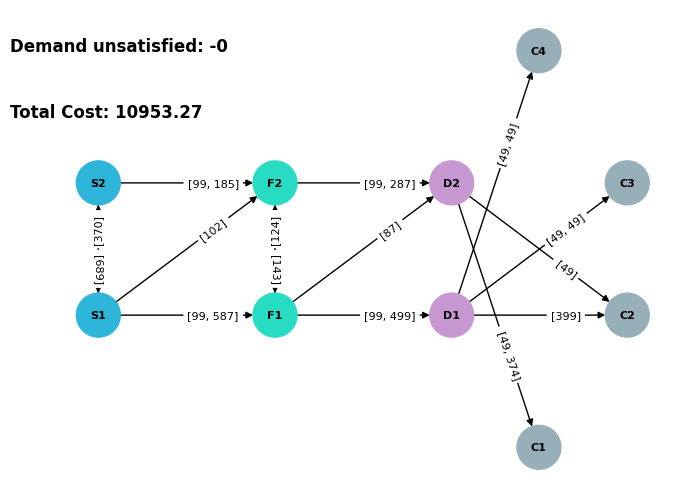

In [6]:
# Display the optimal solution using networkx
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_nodes_from(suppliers)
G.add_nodes_from(factories)
G.add_nodes_from(depots)
G.add_nodes_from(customers)
G.add_edges_from([(arc[0], arc[1]) for arc in product_flow[["From", "To"]].values])

pos = {node: (0, 2+i) for i, node in enumerate(suppliers)}
pos.update({node: (1, 2+i) for i, node in enumerate(factories)})
pos.update({node: (2, 2+i) for i, node in enumerate(depots)})

pos.update({node: (3-0.1*(i-1.5)**4, 1+i) for i, node in enumerate(customers)})

node_color = ['#ca0636']*len(suppliers) + ['#cc8583']*len(factories) + ['#ffe4e1']*len(depots) + ['#59b7d3']*len(customers)
node_color = ['#2db6da']*len(suppliers) + ['#27dcc3']*len(factories) + ['#c797d2']*len(depots) + ['#97afb9']*len(customers)


nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=1000, font_size=8, font_color='black', font_weight='bold')

nx.draw_networkx_edge_labels(G, pos, edge_labels={(arc[0], arc[1]): "{}".format(arc[3]) for arc in product_flow[["From", "To", "Product", "Flow"]].values}, label_pos=0.35, font_size=8,horizontalalignment='center',verticalalignment='center',rotate=True,)

plt.text(-0.5, 3.5, "Total Cost: {:.2f}".format(m.objVal), fontsize=12, fontweight='bold')

plt.text(-0.5, 4, "Demand unsatisfied: {:.0f}".format(unstdemand), fontsize=12, fontweight='bold')
plt.show()
